In [1]:
from pandas import read_csv


base_dir = "../data/analysis"
result = {
    k: read_csv(f"{base_dir}/{k}_form_generation_results.csv")
    for k in ["short", "long"]
}

In [2]:
result["short"]

,model,experiment,accuracy,uncertainty,accuracy_revised,answer_pred_revised,ifhr,temperature,task,model_type
0,llama3,en_en,0.606801,0.350071,0.606801,0.350071,0.000064,1.0,MMLU,Base
1,qwen15,en_en,0.000000,1.540200,0.216137,1.391730,0.792408,1.0,MMLU,Base
2,qwen25,en_en,0.000000,1.385335,0.368081,1.225596,0.446745,1.0,MMLU,Base
3,otg,en_en,0.000000,0.561357,0.587644,0.548167,0.137096,1.0,MMLU,CPT
4,sailor,en_en,0.000057,1.175968,0.390678,0.999252,0.288178,1.0,MMLU,CPT
...,...,...,...,...,...,...,...,...,...,...
67,gemma2,th_th,0.536595,0.193259,0.536722,0.191549,0.009022,1.0,WTI - MC,MLLM
68,llama31,en_en,0.457052,0.561544,0.457052,0.561544,0.004828,1.0,WTI - MC,MLLM
69,llama31,en_th,0.445616,0.694799,0.445616,0.694799,0.006989,1.0,WTI - MC,MLLM
70,llama31,th_en,0.459212,0.643059,0.459339,0.642433,0.012452,1.0,WTI - MC,MLLM


In [3]:
result["long"]

,model,experiment,uncertainty,rouge,ifhr,wle,temperature,task,model_type
0,llama3,en_en_en,1.881896,0.343458,0.000675,0.094450,1.0,WTI - CQA,Base
1,llama3,en_en_th,4.536306,0.097506,0.431489,0.543618,1.0,WTI - CQA,Base
2,llama3,en_th_en,3.483138,0.284994,0.350069,0.291732,1.0,WTI - CQA,Base
3,llama3,en_th_th,2.926878,0.313553,0.122084,0.264820,1.0,WTI - CQA,Base
4,llama3,th_en_en,1.872364,0.367292,0.000135,0.095501,1.0,WTI - CQA,Base
...,...,...,...,...,...,...,...,...,...
123,llama31,en_th_th,4.497624,0.310378,0.050946,0.470976,1.0,WTI - SUM,MLLM
124,llama31,th_en_en,4.819253,0.295461,0.255979,0.368487,1.0,WTI - SUM,MLLM
125,llama31,th_en_th,6.769542,0.143937,0.182976,0.972354,1.0,WTI - SUM,MLLM
126,llama31,th_th_en,7.583318,0.049054,0.890066,0.390725,1.0,WTI - SUM,MLLM


# Short-form generation tasks

## MMLU

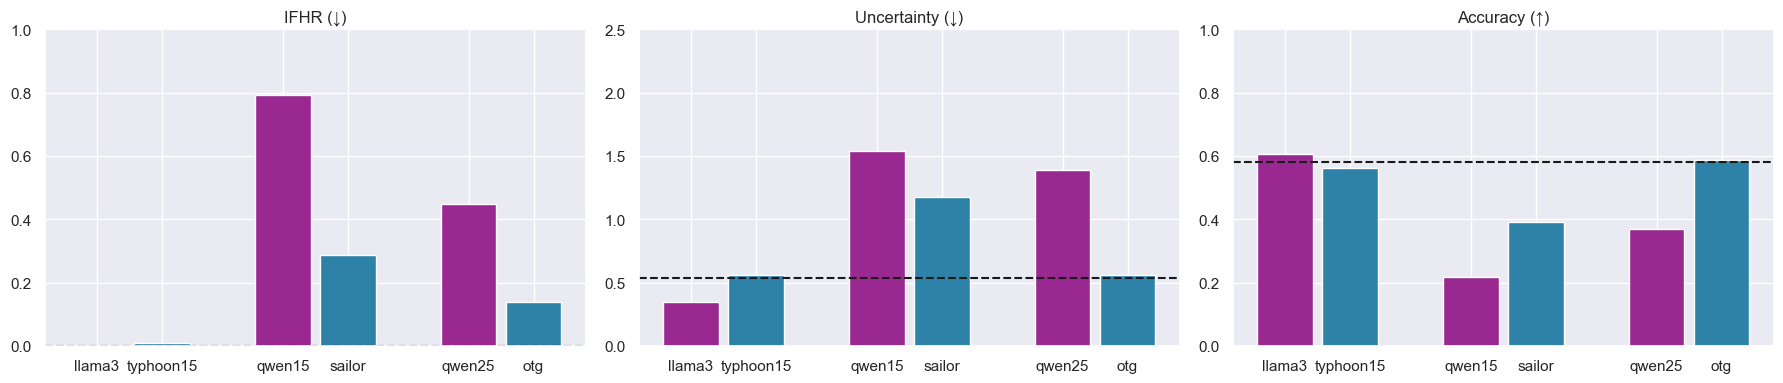

In [4]:
from src.utils.viz import plot_base_vs_cpt


plot_base_vs_cpt(
    df=result["short"],
    expr="en_en",
    task="MMLU",
    use_legend=False,
)

## ThaiExam

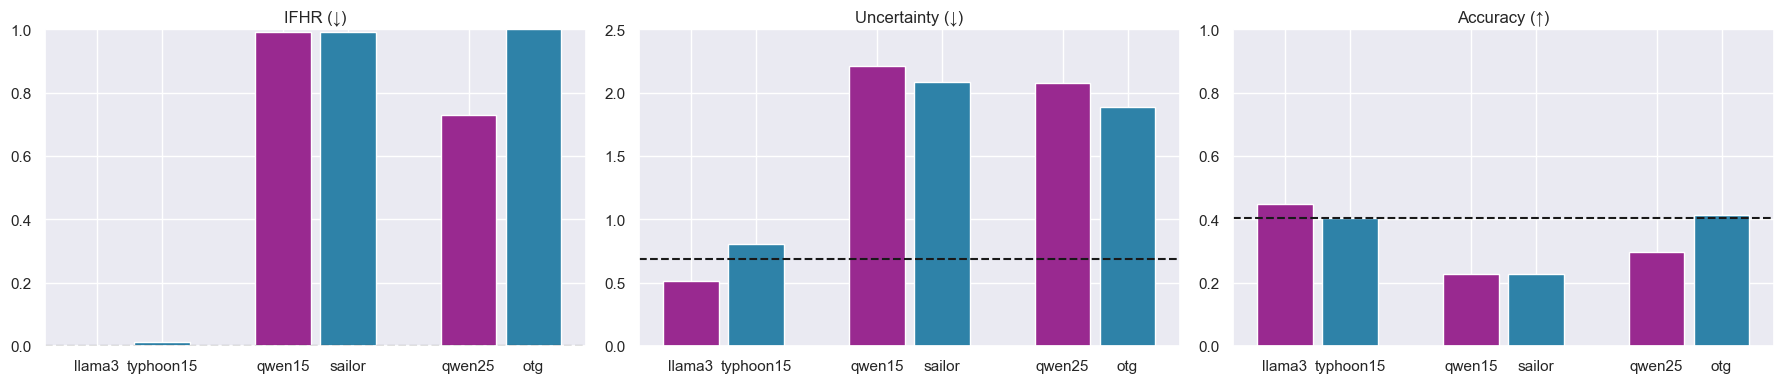

In [5]:
plot_base_vs_cpt(
    df=result["short"],
    expr="en_en",
    task="ThaiExam",
    use_legend=False,
)

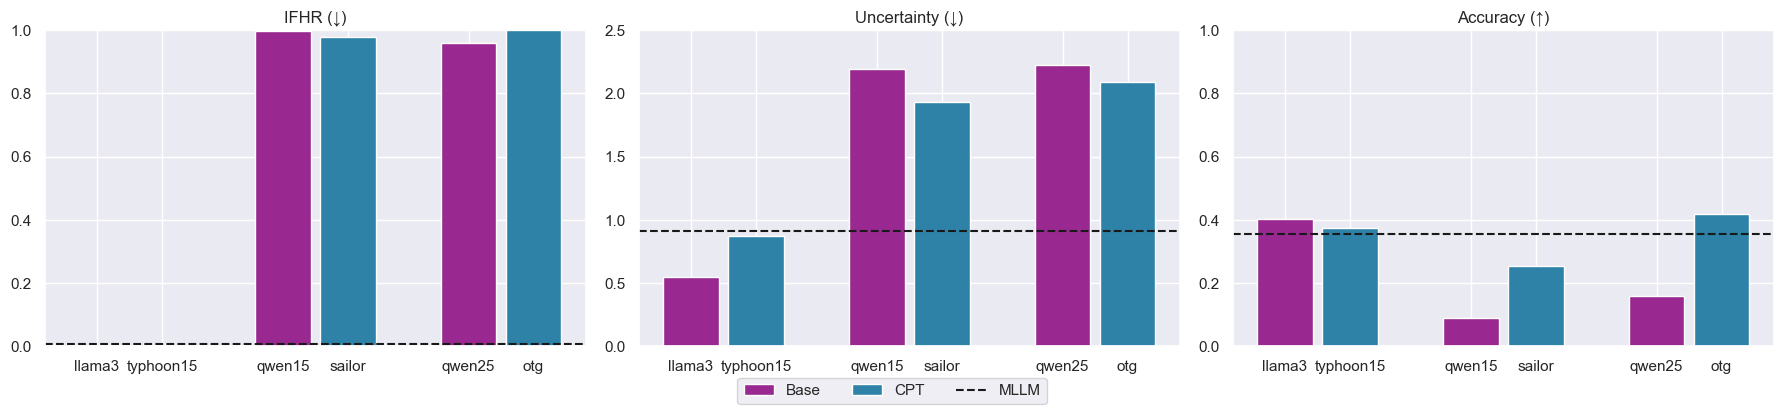

In [6]:
plot_base_vs_cpt(
    df=result["short"],
    expr="th_th",
    task="ThaiExam",
    use_legend=True,
)

## WTI - MC

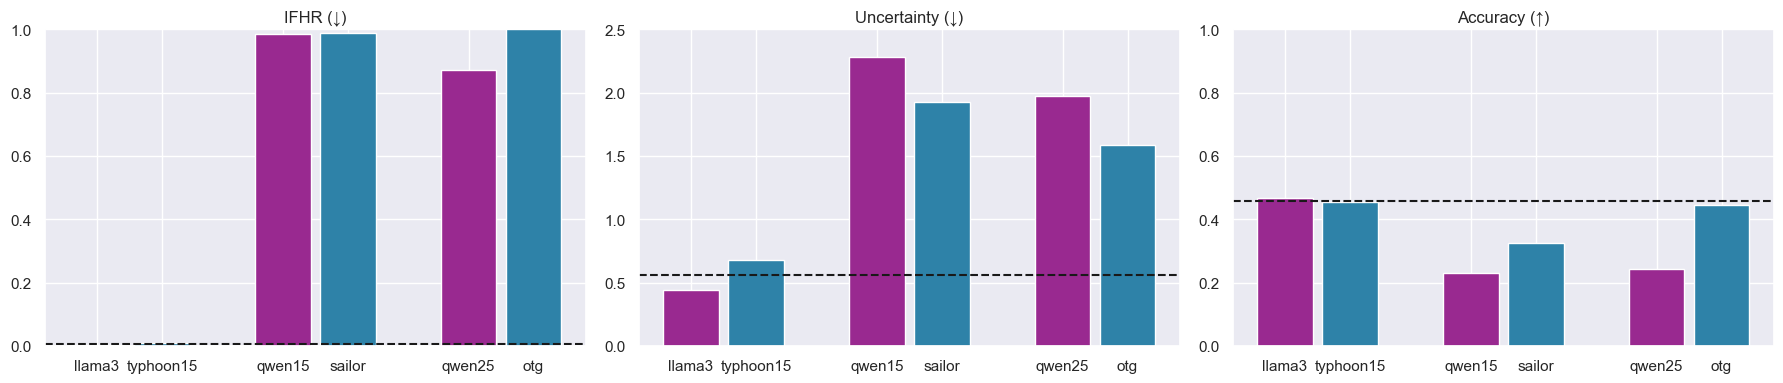

In [7]:
plot_base_vs_cpt(
    df=result["short"],
    expr="en_en",
    task="WTI - MC",
    use_legend=False,
)

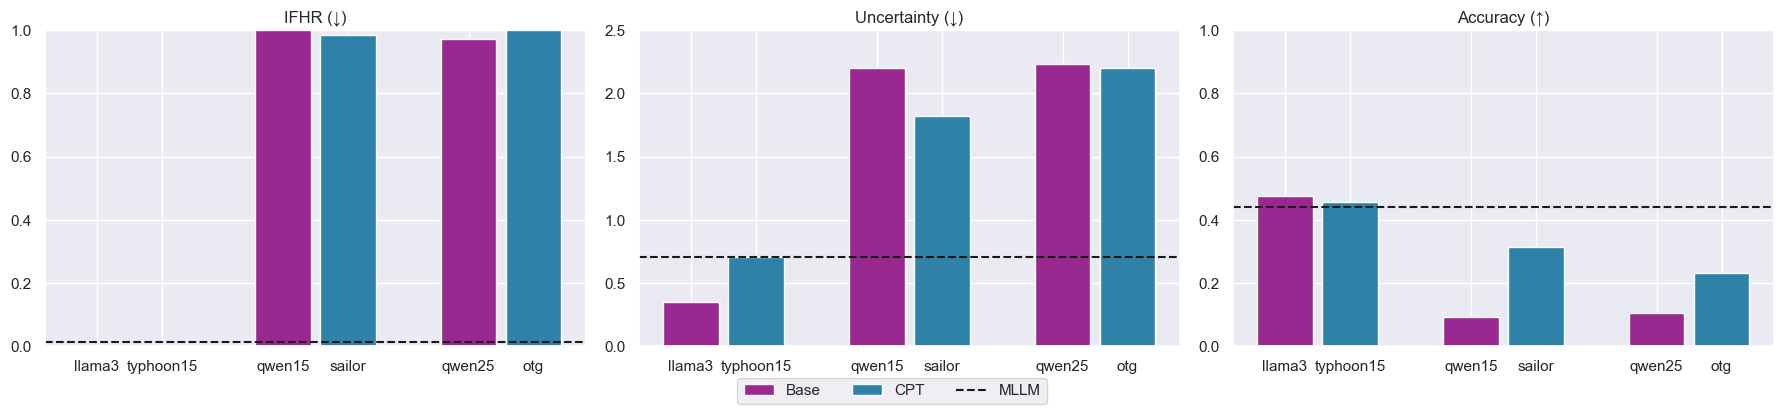

In [8]:
plot_base_vs_cpt(
    df=result["short"],
    expr="th_th",
    task="WTI - MC",
    use_legend=True,
)

## Average

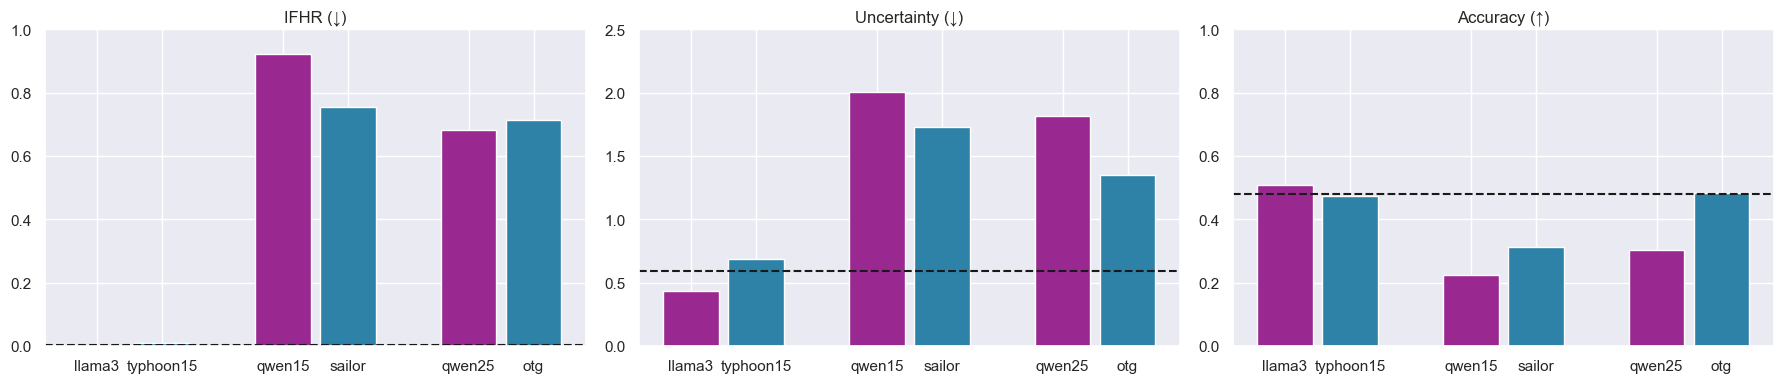

In [9]:
df_tmp = (
    result["short"]
    .groupby(
        by=["model", "experiment"],
        as_index=False,
    )
    .mean(numeric_only=True)
)

plot_base_vs_cpt(
    df=df_tmp,
    expr="en_en",
    task="short",
    use_legend=False,
)

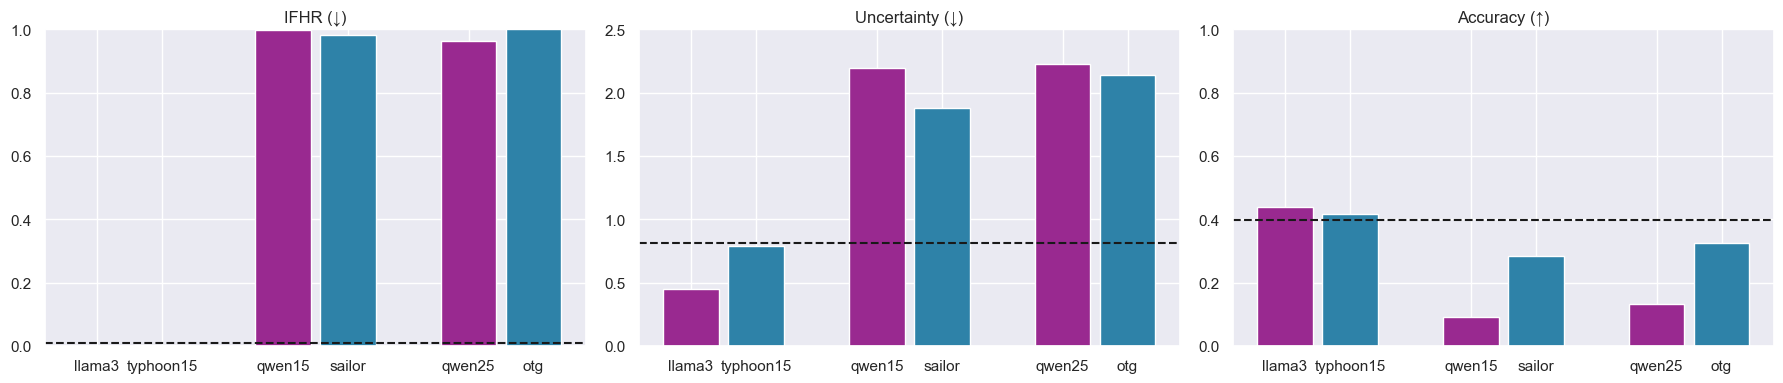

In [7]:
plot_base_vs_cpt(
    df=df_tmp,
    expr="th_th",
    task="short",
    use_legend=False,
)

# Long-form generation tasks

## WTI - CQA

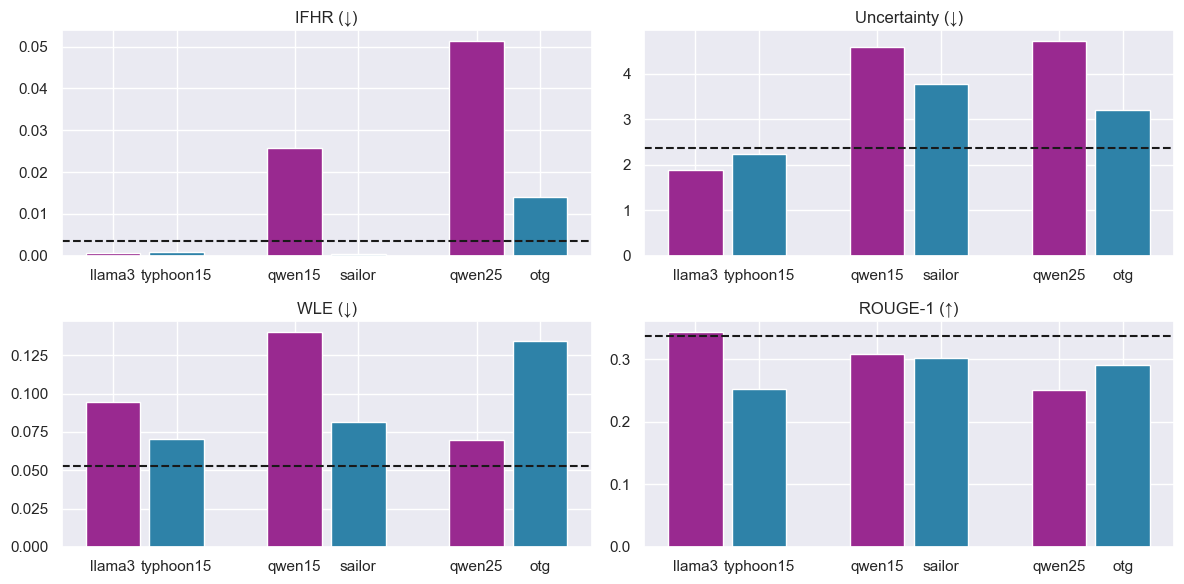

In [11]:
plot_base_vs_cpt(
    df=result["long"],
    expr="en_en_en",
    task="WTI - CQA",
    fix_yaxis=False,
    use_legend=False,
)

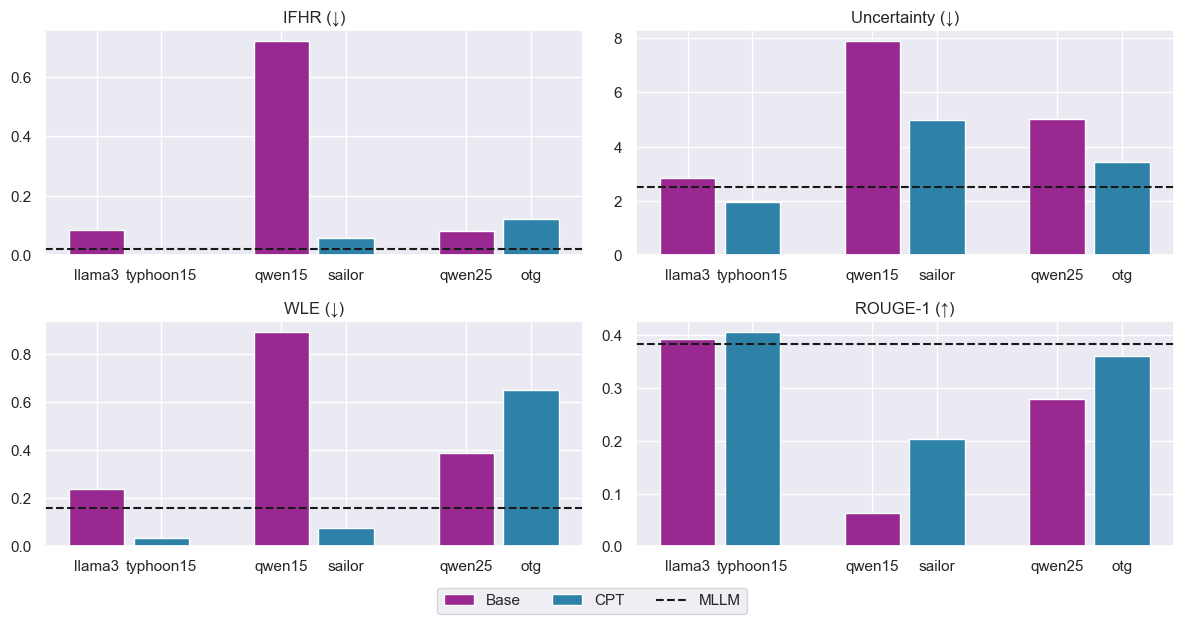

In [12]:
plot_base_vs_cpt(
    df=result["long"],
    expr="th_th_th",
    task="WTI - CQA",
    fix_yaxis=False,
    use_legend=True,
)

## WTI - SUM

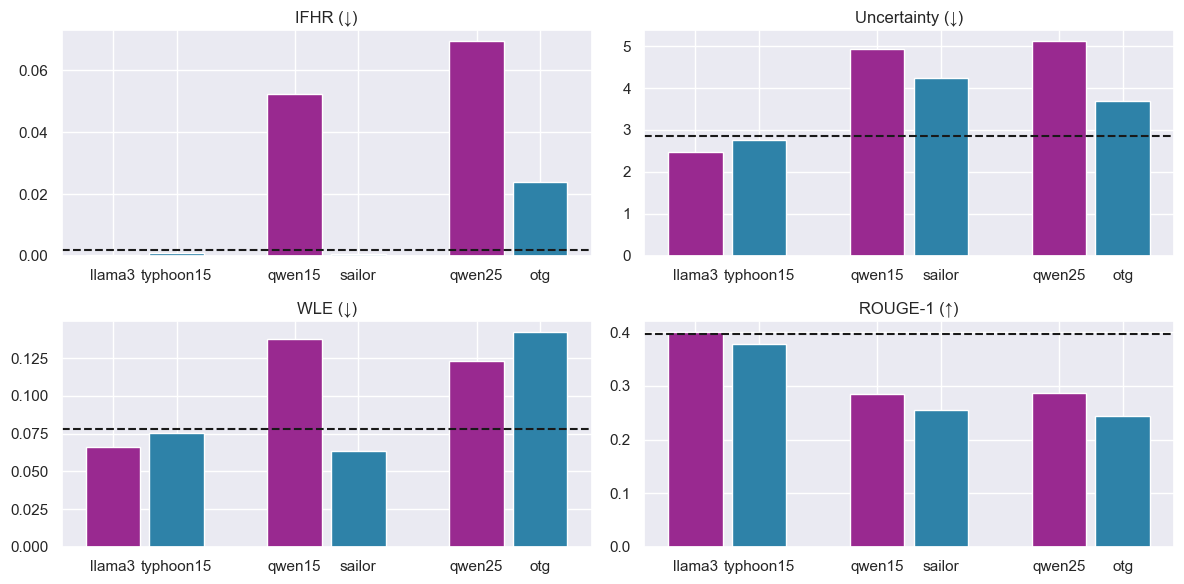

In [13]:
plot_base_vs_cpt(
    df=result["long"],
    expr="en_en_en",
    task="WTI - SUM",
    fix_yaxis=False,
    use_legend=False,
)

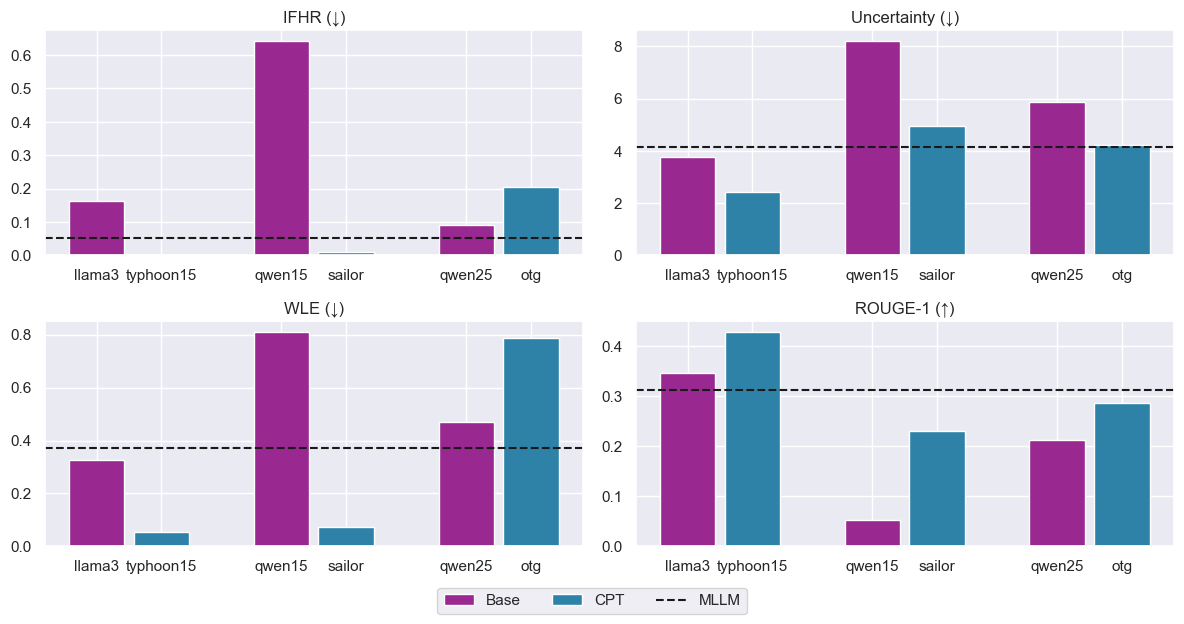

In [14]:
plot_base_vs_cpt(
    df=result["long"],
    expr="th_th_th",
    task="WTI - SUM",
    fix_yaxis=False,
    use_legend=True,
)

## Average

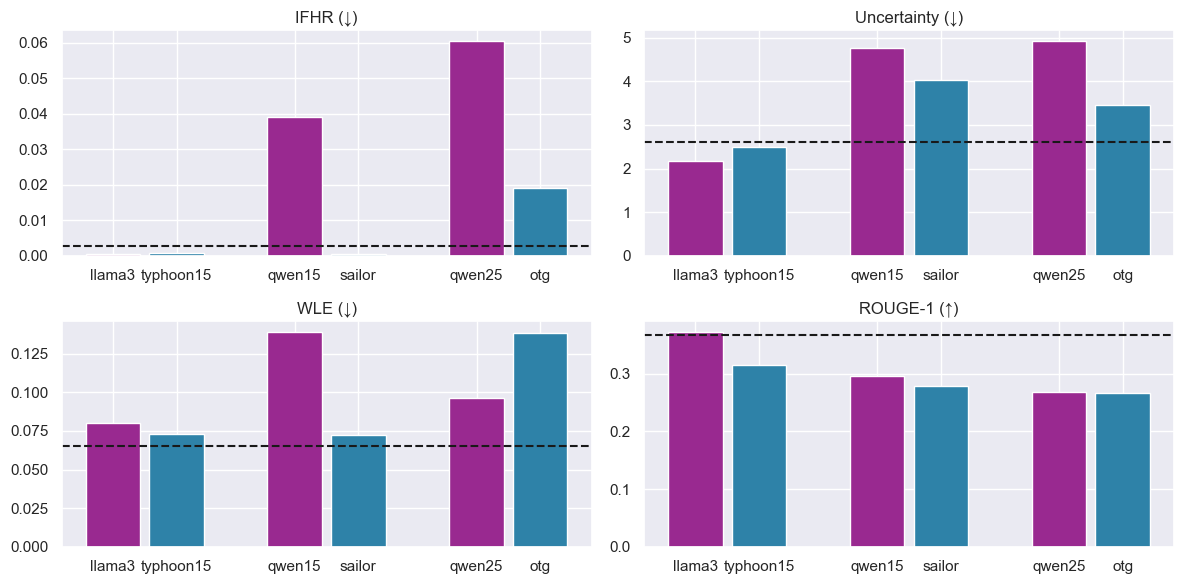

In [15]:
df_tmp = (
    result["long"]
    .groupby(
        by=["model", "experiment"],
        as_index=False,
    )
    .mean(numeric_only=True)
)

plot_base_vs_cpt(
    df=df_tmp,
    expr="en_en_en",
    task="long",
    fix_yaxis=False,
    use_legend=False,
)

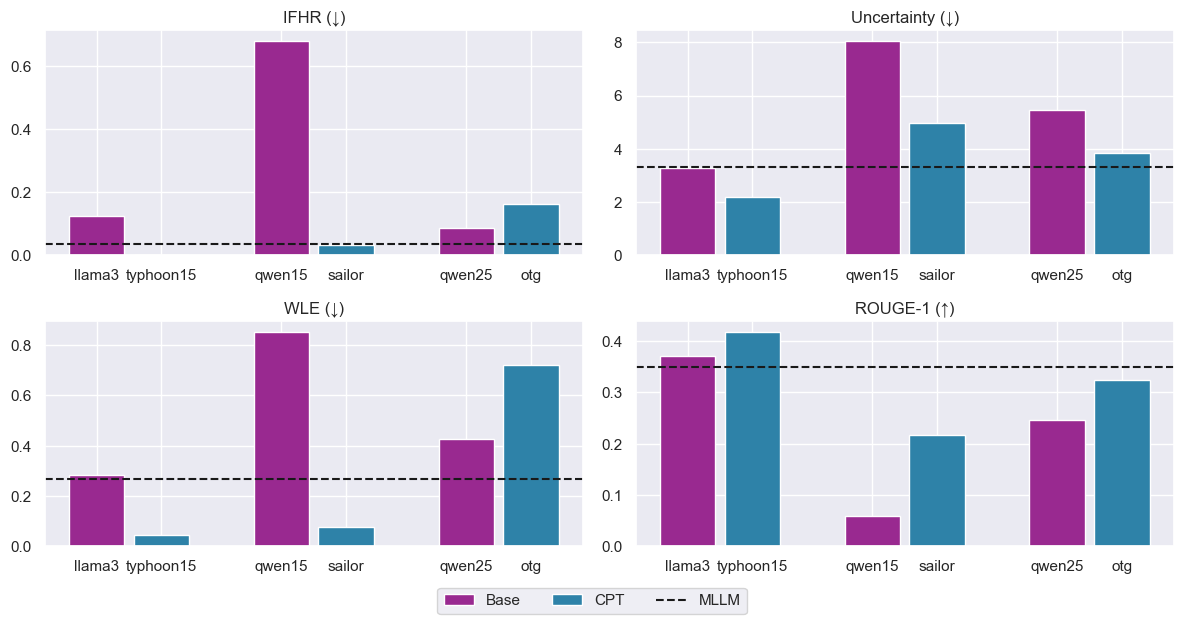

In [16]:
plot_base_vs_cpt(
    df=df_tmp,
    expr="th_th_th",
    task="long",
    fix_yaxis=False,
    use_legend=True,
)